
=== VIF (Factor de Inflación de Varianza) ===
   Variable        VIF
0     const  50.808502
1  usablegc  76.900314
2  usablevc  10.392412
3   density   4.968824
4  porosity  18.009181
5        Ri   4.504874
6       ssa  14.910943
7  specific  47.248711

=== Resumen del Modelo de Regresión ===
                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.602e+25
Date:                Sun, 02 Mar 2025   Prob (F-statistic):               0.00
Time:                        19:41:39   Log-Likelihood:                 2817.9
No. Observations:                 106   AIC:                            -5620.
Df Residuals:                      98   BIC:                            -5599.
Df Model:                           7                                    

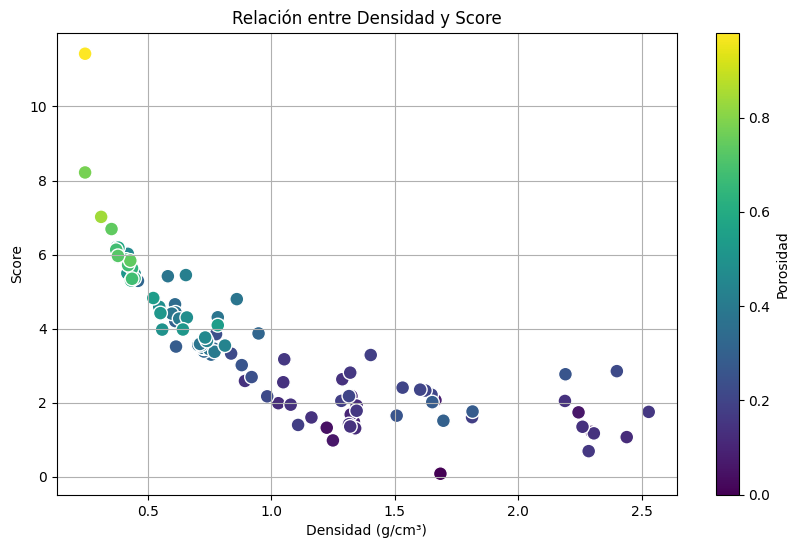

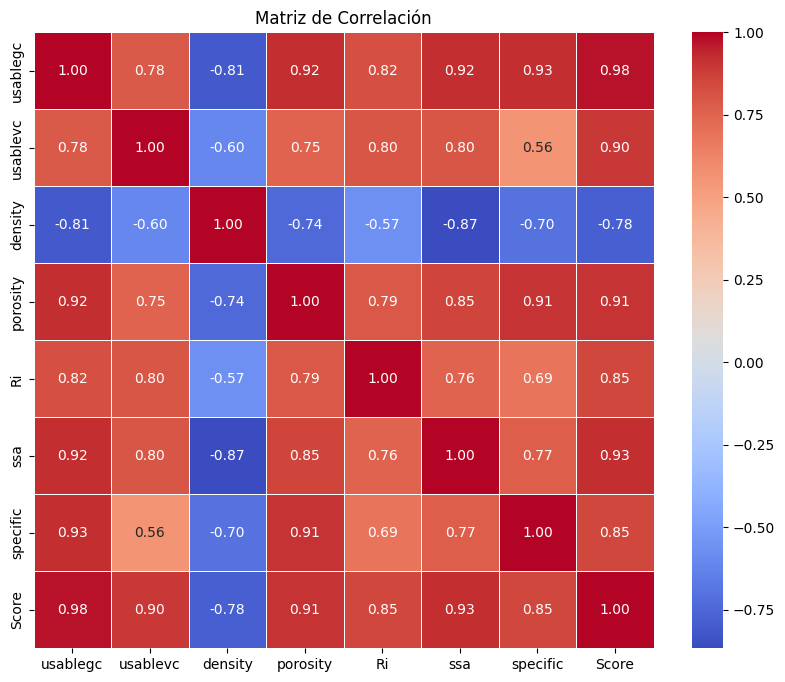

In [6]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Cargar el archivo Excel
file_path = "Parametros_material_juego.xlsx"
df = pd.read_excel(file_path, sheet_name="structuralparameters-vs-capacit")

# Selección y limpieza del primer bloque de datos
cols = ['usablegc', 'usablevc', 'density', 'porosity', 'Ri', 'ssa', 'specific', 'Score']
data = df[cols].dropna()

# Variables independientes y dependiente
X = data[['usablegc', 'usablevc', 'density', 'porosity', 'Ri', 'ssa', 'specific']]
y = data['Score']

# Análisis de multicolinealidad (VIF)
X_const = sm.add_constant(X)
vif = pd.DataFrame()
vif["Variable"] = X_const.columns
vif["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
print("\n=== VIF (Factor de Inflación de Varianza) ===")
print(vif)

# Opcional: Eliminar variables con VIF alto (>10 es indicativo de multicolinealidad severa)
# X = X.drop(columns=['variable_con_vif_alto'])

# Modelo de regresión
X = sm.add_constant(X)
modelo = sm.OLS(y, X).fit()

# Resultados
print("\n=== Resumen del Modelo de Regresión ===")
print(modelo.summary())

# Gráfico de dispersión Density vs Score, coloreando por Porosity
plt.figure(figsize=(10,6))
scatter = plt.scatter(
    data['density'],
    data['Score'],
    c=data['porosity'],
    cmap='viridis',
    s=100,
    edgecolors='w'
)
plt.title('Relación entre Densidad y Score')
plt.xlabel('Densidad (g/cm³)')
plt.ylabel('Score')
cbar = plt.colorbar(scatter)
cbar.set_label('Porosidad')
plt.grid(True)
plt.show()

# Heatmap de correlación
plt.figure(figsize=(10,8))
sns.heatmap(
    data.corr(),
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5
)
plt.title('Matriz de Correlación')
plt.show()
